In [1]:
from IPython.display import Image
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

sns.set()

In [2]:
%config InlineBackend.figure_format = 'retina'

#### Populations vs. Samples

First of all, we need to well-defined target population.
- Important first step: Define target population of interest in concrete terms!
    - Who are we measuring?
        - Males?
        - African-American males?
        - Older African-American males?
        - What does "older" mean? Be specific!
<br> &nbsp;
- What time frame are we insterested in?
    - 2018? April 2018?
    - The first half of April in 2018?
<br> &nbsp;
- Where is the population located in?
    - The Midwest? Michigan?
    - Washtenaw county?
    - The city of Ann Arbor?

Given a target population, now what? How can we make inferential statements about it?
- **Option 1:** Conduct a census! 
   - Eaiser for smaller target populations
   - Incredibly expensive for larger populations
   - Requires a careful evaluation of,
       - how much it will cost to measure all population units
       - what administrative data sources already available
<br> &nbsp;
- **Option 2:** Select a scientific probability sample
    - Construct list of all units in population = sampling frame
    - Determine probability of selection for every unit on list (known and non-zero)
    - Select units from list at random, with sampling rates for different subgroups determined by probabilities of selection
    - Attempt to measure randomly selected units
<br> &nbsp;
- **Option 3:** Select a non-probability sample
    - Generally does not involve random selection
    - Probabilities of selection can't be determined for population units
    - Examples,
        - **opt-in web surveys:** In these opt-in web surveys, you're really just trying to take whoever's interested in taking that web survey. You're not selecting people at random from some well-defined list or a sampling frame. It's whoever wants to volunteer, to participate in that particular web survey. And as a result, we can't determine those probabilities of selection.
        - **quota sampling:** That is, you try to recruit as many people as you can who fit certain subgroup definitions. For example, older African-American males until you hit some target. Some number of individuals that you wish to measure. And in some of those cases with quota sampling, researchers try to collect as many individuals as they can not according to any probability scheme, but just based on whoever's available. Just as long as they hit their targets or their quotas. This too is another example of non-probability sampling where again, we can't write down probabilities of being selected in that sample. 
        - **snowball sampling:** This is where, as you can imagine a snowball, if you roll it down a hill, it keeps getting bigger and bigger and you're gathering more and more snow as the snowball rolls. In this case, you recruit somebody to participate in a study, and then they might tell a friend, and then that friend might tell a friend, and your sample ultimately gets bigger by collecting individuals from this chain that you can see up here on the screen. So in these cases, again, the friends are recruiting friends and social networks. And we don't really have control over who they recruit, or the probabilities with which they're going to recruit these other individuals. So snowball sampling, it's a convenient tool for recruiting a sample. But as researchers, we don't have control over those probabilities of selection.
        - **convenience sampling:** This is another way that we could collect non-probability samples. For example, you might go out on the street and just talk to people who are available to collect data and ask questions. If you're teaching in a university or business setting, you might just collect data from the individuals in your courses. Or from your coworkers or whoever's close to you. Again, no probabilities of selection involved.

#### Probability Sampling
##### Option 1: Simple Random Sampling (SRS)
- Notice that, this method is often expensive for large populations
- Start with known list of *N* population units, and randomly select *n* units from the list
- Every unit has **equal probability of selection** = *n* / *N*
- All possible samples of size *n* are equally likely
- Estimates of means, proportions, and totals based on SRS are **unbiased** (equal to the population values on average!)
<br> &nbsp;
- SRS example,
    - Customer service database: N=2500 email requests in 2018
    - Director wants to estimate: mean email response time
    - Exact calculations require manul review of each email thread
    - Ask analytics team: sample, process and analyze n=100 emails
    <br> &nbsp;
    - **Naive Approach:** process the first 100 emails on list
        - Estimated mean could be **biased** if customer service representatives learn or get better over time at responding more quickly
        - First 100 observations may come from a small group of staff
        - Not fully representative, independent, or identically distributed!
        - No random selection according to specific probabilities!
    <br> &nbsp;
    - **Better SRS Approach:** number emails 1 to 2500 and randomly select 100 using a random number generator
        - Every email has known probability selection = 100 / 2500
        - Produces random, representative samples of 100 emails (in theory)
        - Estimated mean response time will be an unbiased estimate of the population mean
<br> &nbsp;

##### Option 2: Complex Samples
- Population divided into different **strata**, and part of sample is allocated to each **stratum**; -> ensures sample representation from each stratum, and reduce variance of survey estimates (stratification)
- **Clusters** of population units (e.g., counties) are randomly sampled first (with known probability) within strata, to save cost of data collection (collect data from cases close to each other geographically)
- Units randomly sampled within clusters, according to some probability of selection, and measured
<br> &nbsp;
- A unit's probability of selection is determined by:
    - Number of clusters sampled from each stratum
    - Total number of clusters in population each stratum
    - Number of units ultimately sampled from each cluster
    - Total number of units in population in each cluster
<br> &nbsp;
- Why probability sampling?
    - Having known, non-zero probability of selection for each unit in population and subsequent random sampling ensures all units will have a chance of being sampled
    - Probability sampling allows us to compute unbiased estimates, and also estimate features of the sampling distribution of estimates that we would see if many of the same types of probability samples were selected
    - Most importantly, probability sampling provides a stastistical basis for making inferences about certain quantities in larger populations

#### Non-Probability Sampling
- Features of non-probability samples,
    - Probabilities of selection can't be determined for sample units
    - No random selection of individual units
    - Sample divided into groups (strata) or clusters, but clusters not randomly sampled in earlier stage
    - Data collection often very cheap relative to probability sampling
    - Please keep in mind, you can find the types of non-probability sampling in the beginning of the notebook.
<br> &nbsp;
- What is the problem?
    - Non-probability sample -> no statistical basis for making inference about larger population from which sample selected
    - Knowing probabilities of selection (in addition to population strata and randomly sampled clusters)
        - can estimate features of sampling distribution (if were to take many random samples using same design)
    - Sampled units not selected at random -> strong risk of sampling bias (e.g., people actually insterested in visiting particular web site)
    - Sampled units not generally representative of larger target population of interest
    - **Big Data** (e.g., information from millions of tweets) often from non-probability samples
<br> &nbsp;
- So what can we do?
    - Two possible approaches,
        - Pseudo-Randomization
        - Calibration
    <br> &nbsp;
    - **Option 1:** Pseudo-Randomization Approach
        - Combine non-probability sample with a probability sample (that collected similar measurements)
        - Estimate probability of being included in non-probability sample as a function of auxiliary information available in both samples
        - Treat estimated probabilities of selection as "known" for non-probability sample, use probability sampling methods for analysis
<br> &nbsp;

    - **Option 2:** Calibration Approach
         - Compute weights for responding units in non-probability sample that allow weighted sampled to mirror a known population
         - Non-probability sample: 70% female, 30% male
         - Population: 50% female, 50% male
             - Down-weight females and up-weight males
         - Limitation: if weighting factor not related to variable(s) of interest will not reduce possible sampling bias
<br> &nbsp;

Twitter Example: Non-Probability Sampling
- API to extract into from several hundred thousand tweets and indicator of support for President Trump computed
    - Probability of a tweet being selected cannot be determined
    - Twitter users not a random sample for larger population
    - Lots of data but,
        - high potential for sampling bias
        - lack of representation: may only capture people with strong opinions!

#### What is the sampling distribution?
- Recall: Distribution of values on a variable of interest
    - Example: Normal distribution (bell curve)
- Assume values on variable of interest would follow certain distribution if we could measure entire population
- Recall: When we select porbability samples to make inferential statements about larger populations
- Sampling distribution: distribution of survey estimates we would see if we selected many random samples using same sample design, and computed an estimate from each
<br> &nbsp;
- **Key properties** of sampling distribution,
    - Hypothetical! What would happen if we had luxury of drawing thousands of probability samples and measuring each of them?
    - Generally very different in appearance from distribution of values on a single variable of interest
    - With large enough probability sample size, sampling distribution of estimates will look like a normal distribution, regardless of what estimates are being computed! **Central Limit Theorem**

#### What is sampling variance?
- Variability in the estimates described by the sampling distribution
- Because we select a sample (do not measure everyone in a a population) a survey estimate based on a single sample will not be exactly equal to population quantity of interest (cases are randomly selected!) 
- This called as **Sampling Error**
- Across hypothetical repeated samples, these sampling errors will randomly vary (some negative, some positive...)
- Variability of these sampling errors describes the variance of the sampling distribution
- If every sample estimate was equal to population quantity of interest (e.g., in the case of a Census), there would be no sampling error, and no sampling variance!
- With a larger probability sample size, sampling more from a given population -> in theory there will be less sampling error, and sampling errors will be less variable
- Larger samples -> less sampling variance! More precise estimates, more confidence in inferential statements (but more costly!)
- Spred of sampling distribution becomes smaller as sample size become larger

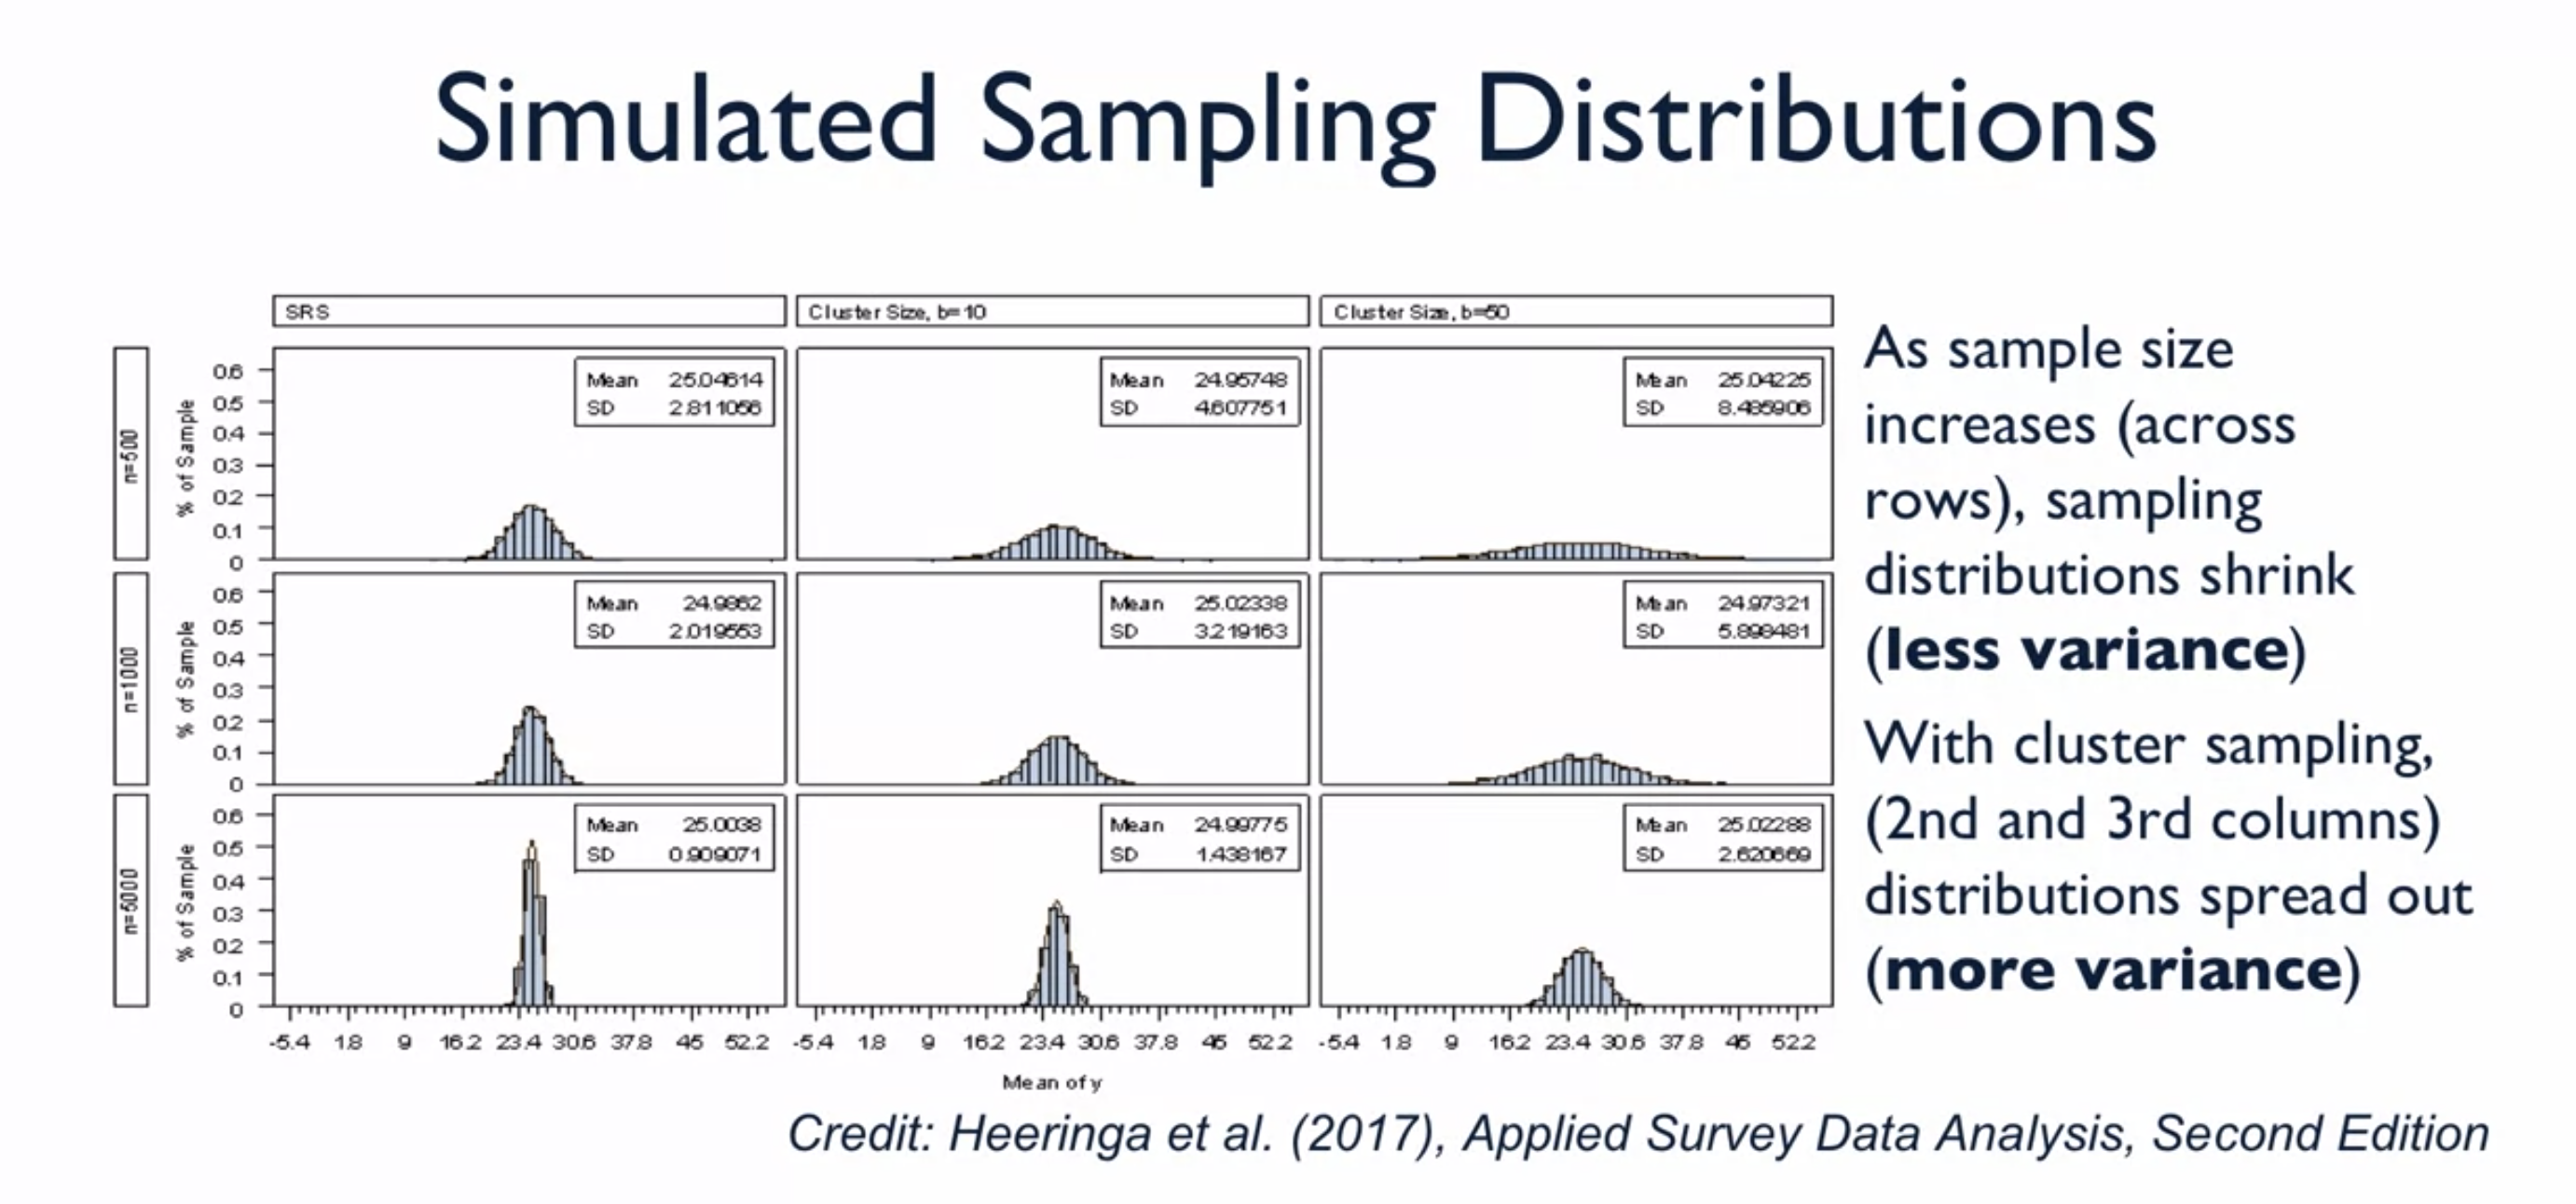

In [3]:
Image('images/example_2.png', width=800)

If you compare a simple random sample of size 500 in the upper left to a cluster sample where there's 50 units selected per 50 cluster of size 5,000 in the lower right, look at those sampling distributions, they're almost the same. So a simple random sample of size 500, the same distribution looks like a cluster sample of size 5,000, where there's 50 units selected per cluster. So, another key trade-off between the probability sampling design and how variable our estimates are.

#### Why is sampling variance important?
- In practice, we only have the resources to select one sample!
- Important sampling theory allows us to estimate features of sampling distribution (including variance!) based on one sample
- "Magic" of probability sampling: can select one probability sample and features of that design tell us what we need to know about the expected sampling distribution
- Because we can estimate variance of sampling distribution based only one sample, we can make inferential statements about where most estimates based on a particular sample design will fall
- Can make statements about likely values of population parameters that account for variability in sampling errors that arises from random probability sampling

#### Making Population Inference Based on Only One Sample

- General approaches to making population inferences based on estimated features of sampling distributions
    - Confidence interval estimate for parameters of estimate
    - Hypothesis testing about paramters of interest
    - Example of parameters of interest: a mean, a proportion, a regression coefficient, an odds ratio, and many more!
- Key Assumption: Normality
    - These approaches assume that sampling distributions for the estimate are (approximately) normal, which is often met if sample sizes are "large"
<br> &nbsp;
- Step 1: Compute the point estimate
    - Compute an unbiased point estimate of the parameter of interest
    - Unbiased point estimate: average of all possible values for point estimate is equal to true parameter value
    - The sampling distribution is centered at the truth!
    - Key idea: want estimate to be unbiased with respect to sample design! if cases had unequal probabilities of selection, those weights need to be used when computing the point estimate!
<br> &nbsp;
- Step 2: Estimate the sampling variance of the point estimate
    - Compute an unbiased estimate of the variance of the sampling distribution for the particular point estimate
    - Unbiased variance estimate: correctly describes variance of the sampling distribution under the sample design used
    - Square root of variance: standard error of the point estimate
<br> &nbsp;
- To form a confidence interval
    - best estimate $\pm$ margin of error
    - best estimate: unbiased point estimate
    - margin of error: "a few" estimated standard errors
    - "a few": multiplier from appropriate distribution based on desired confidence level and sample design
    - 95% confidence level = 5% significance
    - **!!! Caution !!!** important to get all 3 pieces right for correct inference!
        - if best estimate is not unbiased point estimate OR
        - if margin of error does not use correct multiplier OR
        - does not use unbiased estimate of the standard error
        - confidence interval will not have the advertised coverage!
    - Key idea,
        - interval: range of reasonable values for parameter
        - if hypothesized value for parameter lies outside confidence interval, we don't have evidence to support that value at corresponding signifiance level

#### Inference for Non-Probability Samples
- **Approach I: Quasi-Randomization**
    - Stack the two data sets; non-probability sample may have other response variables we are really insterested in
    - Code NSAMPLE = 1 if member of non-probability sample, NSAMPLE = 0 if member of probability sample
    - Fit logistic regression model
        - predicting NSAMPLE with common variables weighting non-probability cases by 1 and weighting probability cases by their survey weights
    - Can predict probability of being in non-probability sample, within whatever population is represented by probability sample!
    - Invert predicted probabilities for non-probability sample, treat as survey weights in standard weighted survey analysis
        - Survey Weight = 1 / Predicted Probability
    - **Issue:** How to estimate sampling variance? Not entirely clear...
<br> &nbsp;
- **Approach II: Population Modeling**
    - Use predictive modeling to predict aggregate sample quantities (usually totals) on key variables of interest for population units not included in the non-probability sample
    - Compute estimates of interest using estimated totals
        - Weighted Mean = Predicted Total Estimated / Estimated Population Size
        - NOTE: Don't need probability sample with same measures
    - Need good regression models to predict key variables using other auxiliary information available at aggregate level
    - Standard errors can be based on fitted regression models, or using similar replication methods!

#### Complex Samples
- **Stratification:** Allocation of overall sample to different "strata", or mutually exclusive divisions of the population. (e.g., regions of the USA)
    - Several different allocation schemes are possible
    - Aim: minimize sampling variance for particular variables given fixed costs
    - Example: Proportionate Allocation
        - If 70% of a population appears in one stratum and 30% in the order;
        - Then 70% of the overall sample would be allocated to the first stratum, and 30% to the second
    - Stratification will eliminate between-stratum variance in means (or totals) on variable from the sampling variance!
    - Important to account for stratification in analysis; else sampling variance may be artificially large -> inferences too conservative, confidence intervals too wide!
<br> &nbsp;
- **Clustering**: Random sampling of larger clusters of population elements, possibly across multiple stages (e.g., counties, then segments, then households)
    - Reduces cost of data collection: expensive too visit n randomly sampled units from large and widespread population
    - Clustering reduces cost but tends to increase sampling variance of estimates
        - Why? Units within same cluster have similar (correlated)
        - Variables on variables of interest -> don't measure unique info!
    - Important to account for cluster sampling in analysis, else inferences too liberal, confidence intervals too narrow!
<br> &nbsp;
- **Weighting**
    - Complex samples are still probability samples, but if...
        - Multiple stages of cluster sampling within strata
        - Or certain subgroups sampled at higher rates (oversampling)
        - Unequal probabilities of selection for different units
        - Need to account for these unequal probabilites to make unbiased population inferences
    - How? Use of weights in analysis... (partly) defined by inverse of probability of selection
        - If my probability is 1/100 -> my weight is 100
        - I represent myself and 99 others in the population!
        - If my probability is 1/100 and I belong to subgroup where only 50% responded,
        - My adjust weight = (1 / 0.1) x (1 / 0.5) = 200
   - Important need to use weights so estimates are unbiased with respect to the sample design; else possible serious bias!
   - **Drawback:** like cluster sampling, highly variable adjusted survey weights tend to increase sampling variance of weighted estimates (even if they produce unbiased estimates!)

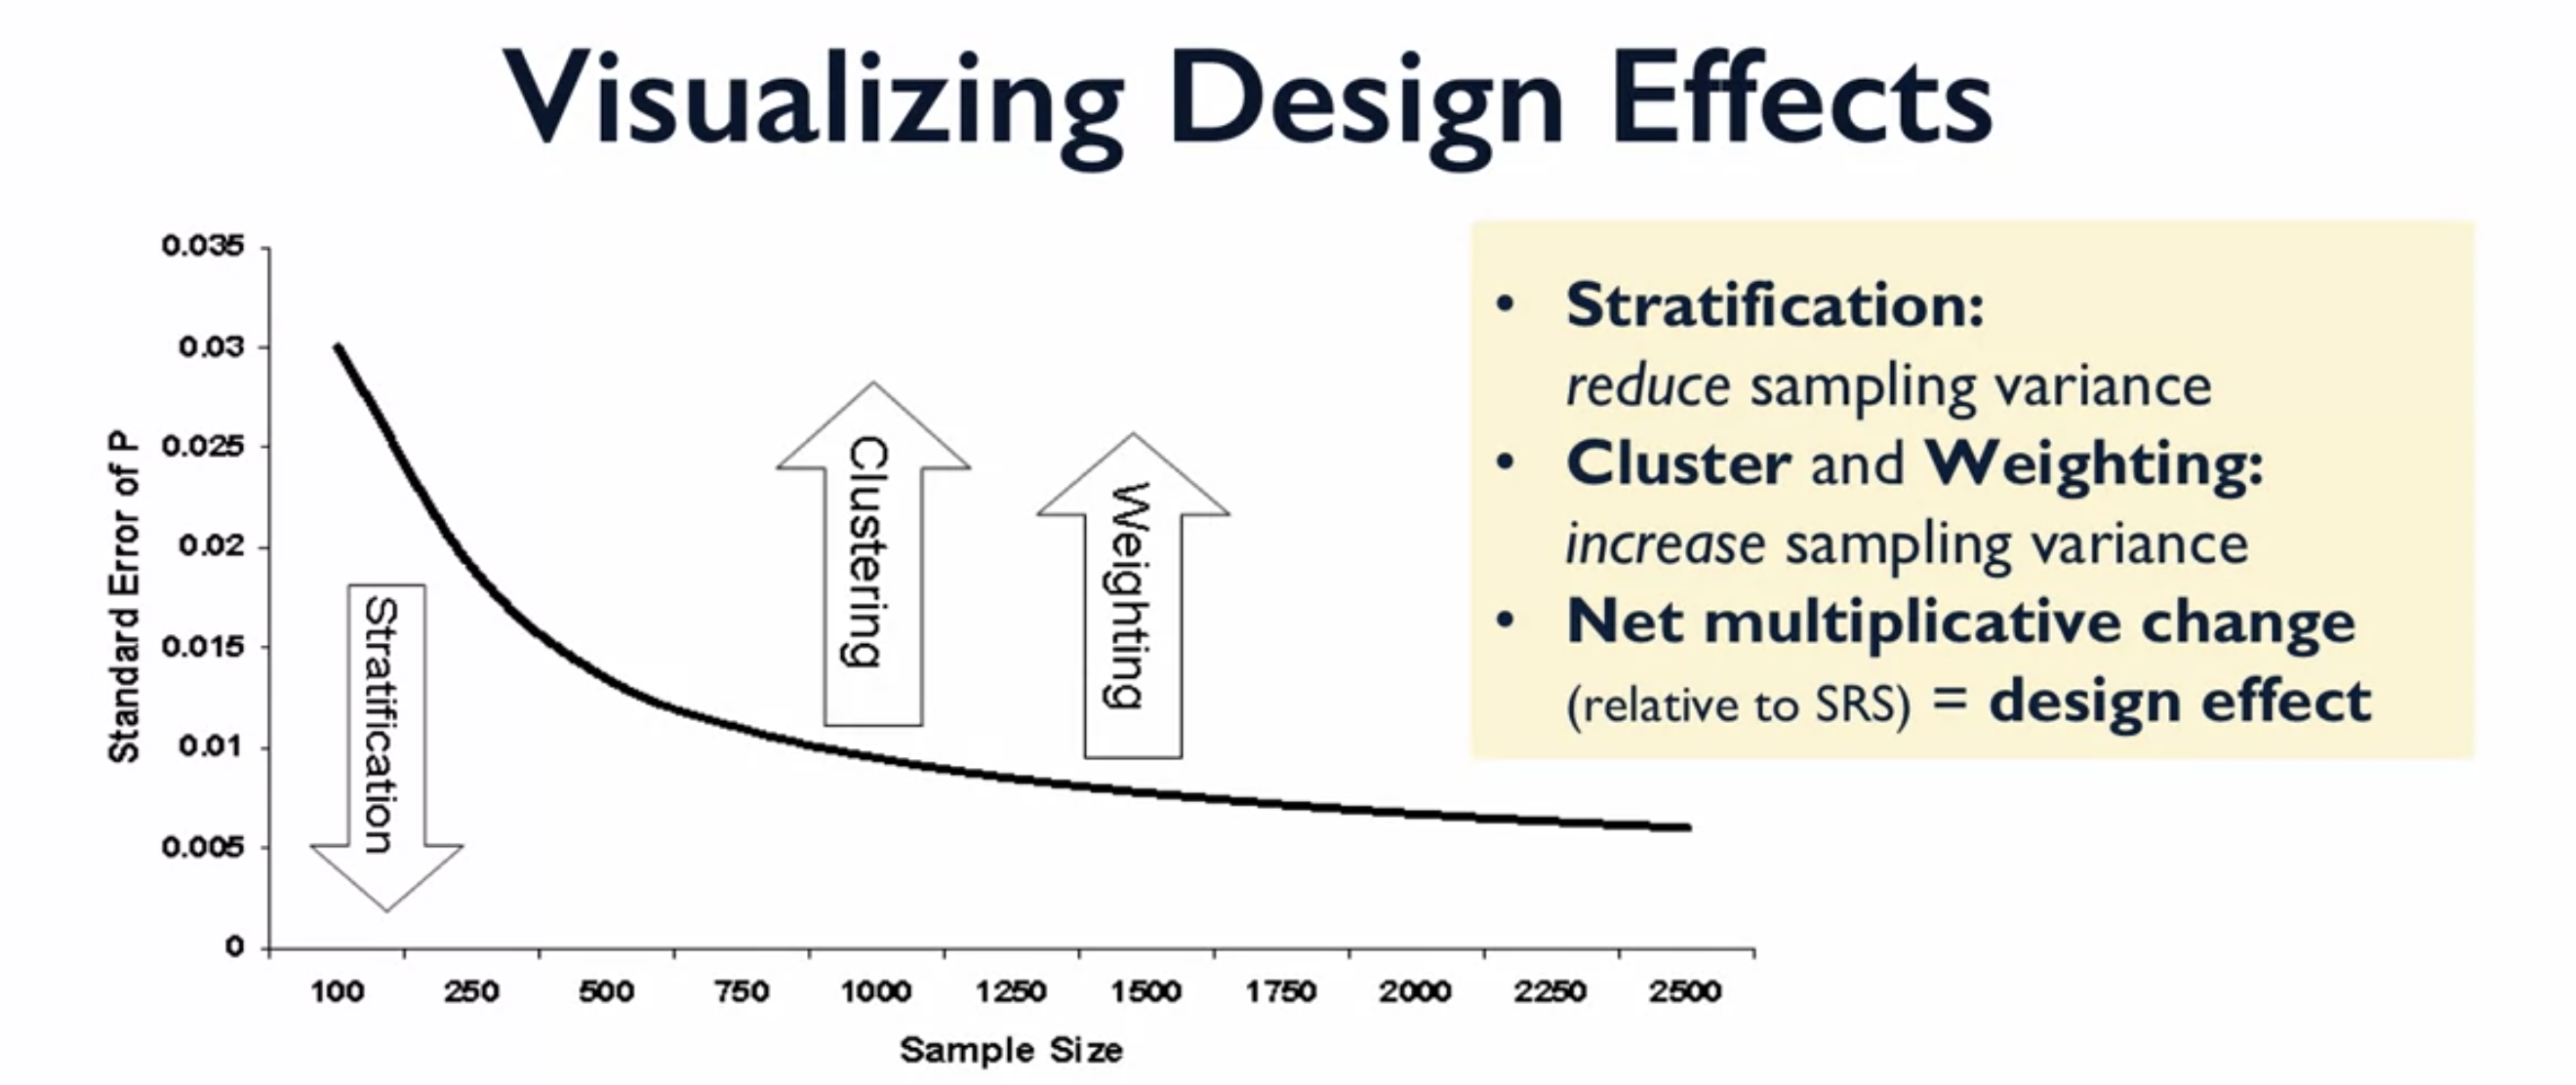

In [4]:
Image('images/example_3.png', width=800)

#### Sampling from a Biased Population

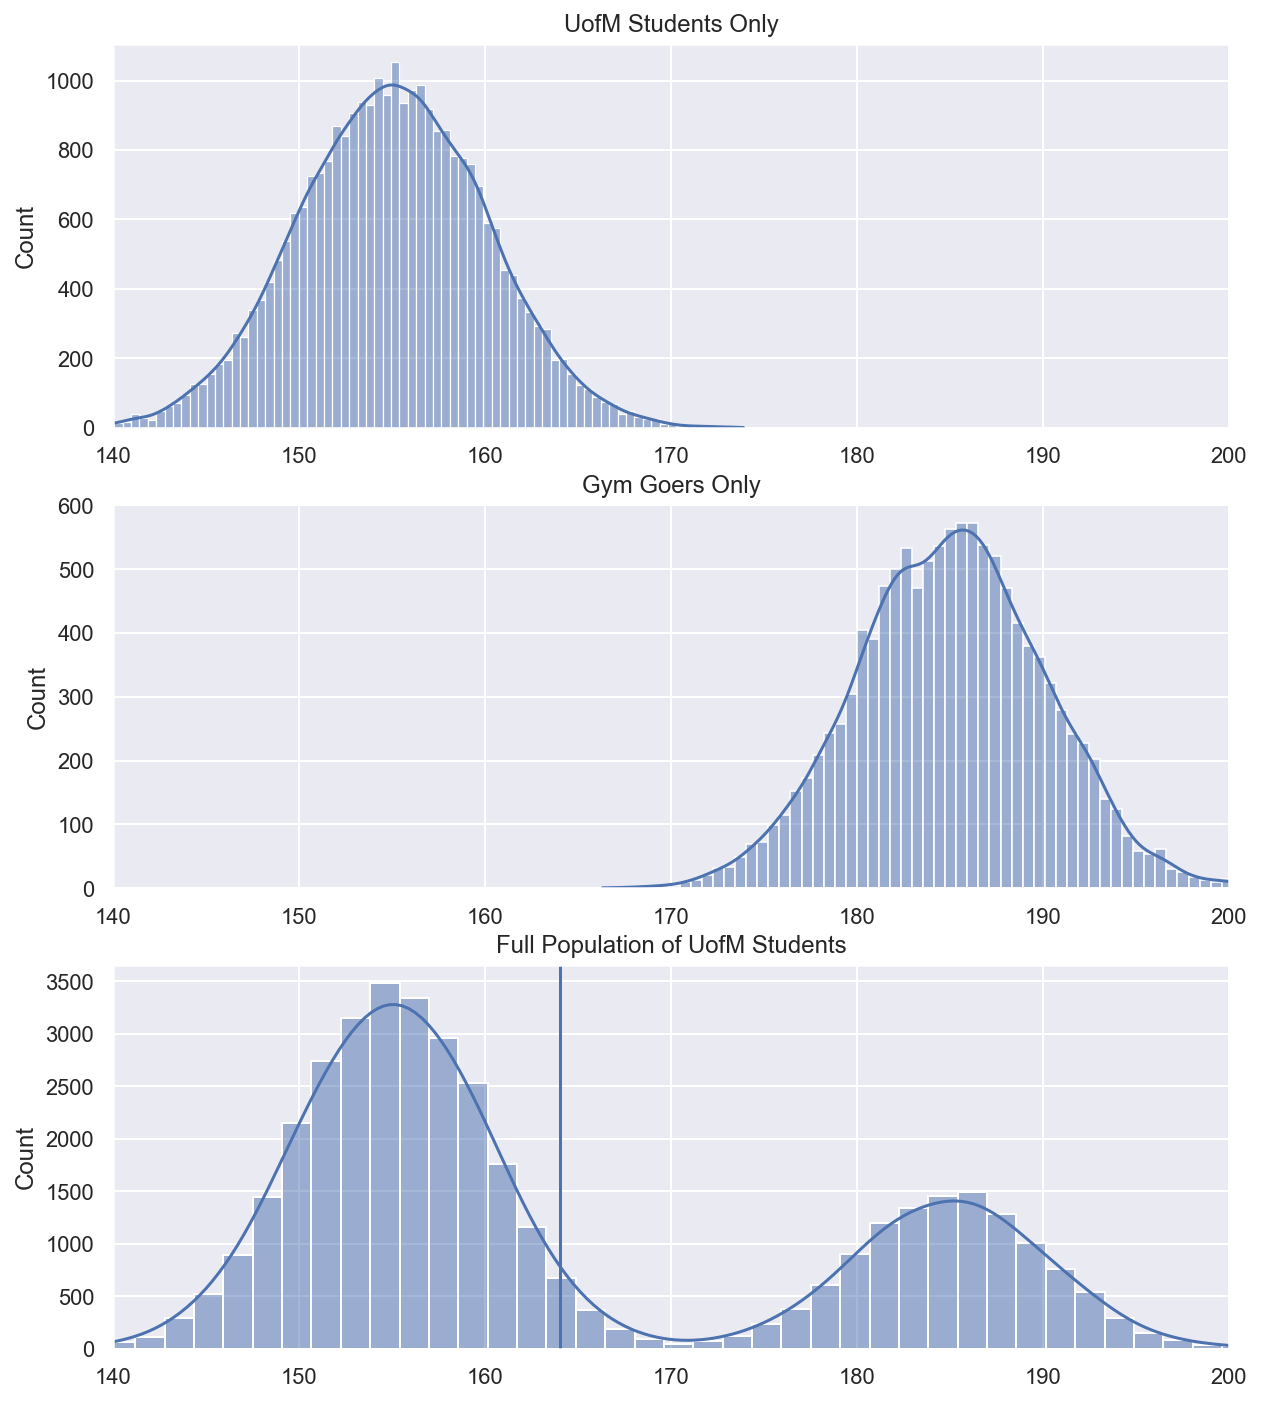

In [5]:
# recreate the simulations from the video 
mean_uofm = 155
sd_uofm = 5
mean_gym = 185 
sd_gym = 5 
gymperc = .3
total_pop_size = 40000

# create the two subgroups
uofm_students = np.random.normal(
    mean_uofm, 
    sd_uofm, 
    int(total_pop_size * (1 - gymperc))
)

students_at_gym = np.random.normal(
    mean_gym, 
    sd_gym, 
    int(total_pop_size * gymperc)
)

# create the population from the subgroups
population = np.append(uofm_students, students_at_gym)

plt.figure(figsize=(10, 12))

# plot the UofM students only
plt.subplot(3, 1, 1)
sns.histplot(uofm_students, kde=True)
plt.title('UofM Students Only')
plt.xlim([140, 200])

# plot the Gym Goers only
plt.subplot(3, 1, 2)
sns.histplot(students_at_gym, kde=True)
plt.title('Gym Goers Only')
plt.xlim([140, 200])

# plot both groups together
plt.subplot(3, 1, 3)
sns.histplot(population, kde=True)
plt.title('Full Population of UofM Students')
plt.axvline(np.mean(population))
plt.xlim([140, 200])

plt.show()

#### What happens if we sample from the entire population?

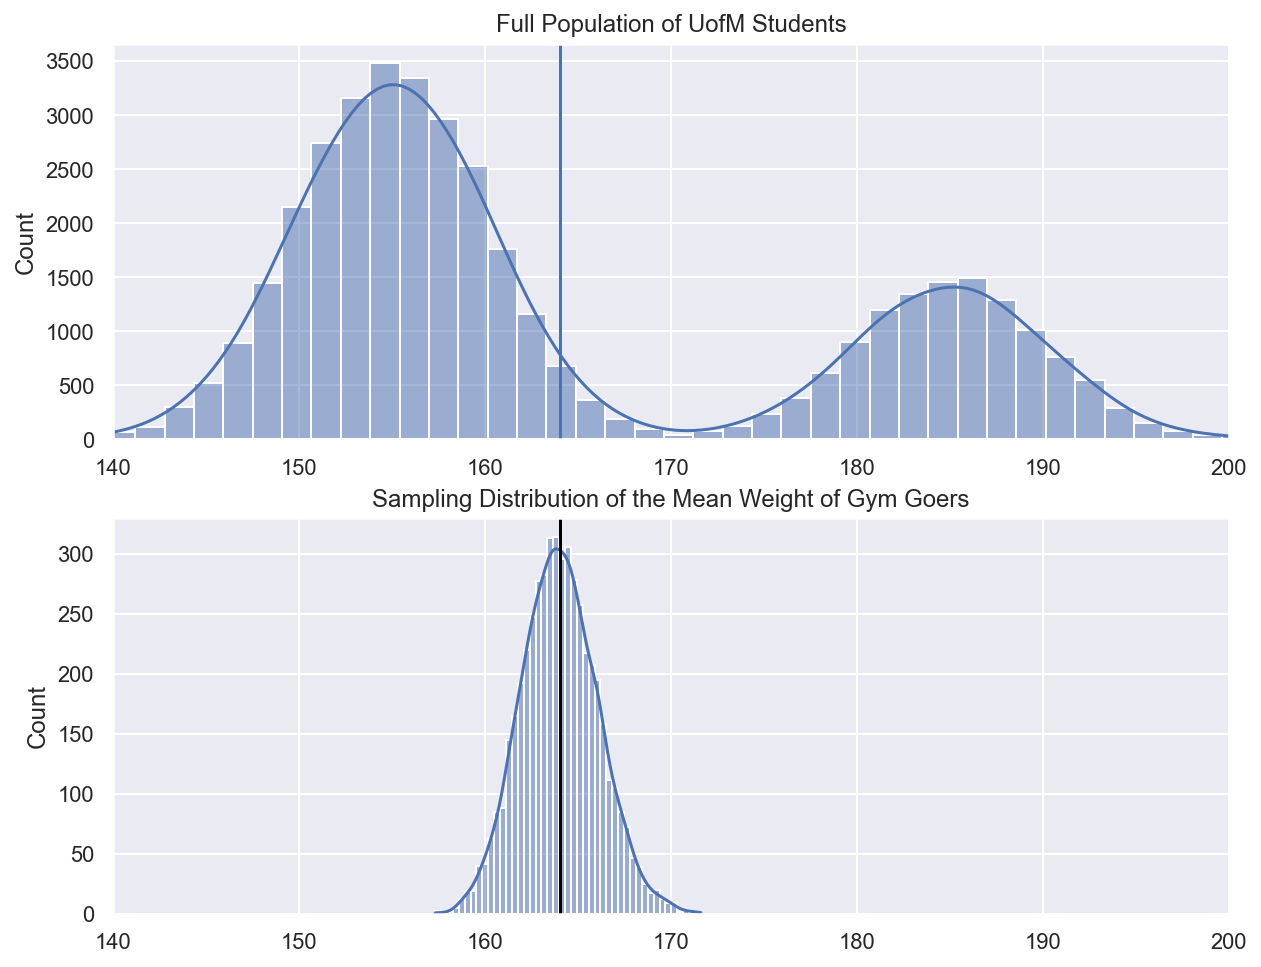

In [6]:
# simulation parameters
number_samps = 5000
samp_size = 50

# get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(number_samps)
for i in range(number_samps):
    random_students = np.random.choice(population, samp_size)
    mean_distribution[i] = np.mean(random_students)
    
plt.figure(figsize=(10, 8))

# plotting the population again
plt.subplot(2, 1, 1)
sns.histplot(population, kde=True)
plt.title('Full Population of UofM Students')
plt.axvline(np.mean(population))
plt.xlim([140, 200])

# plotting the sampling distribution
plt.subplot(2, 1, 2)
sns.histplot(mean_distribution, kde=True)
plt.title('Sampling Distribution of the Mean Weight of Gym Goers')
plt.axvline(np.mean(population))
plt.axvline(np.mean(mean_distribution), color='black')
plt.xlim([140, 200])

plt.show()

#### What happens if we take a non-representative sample?

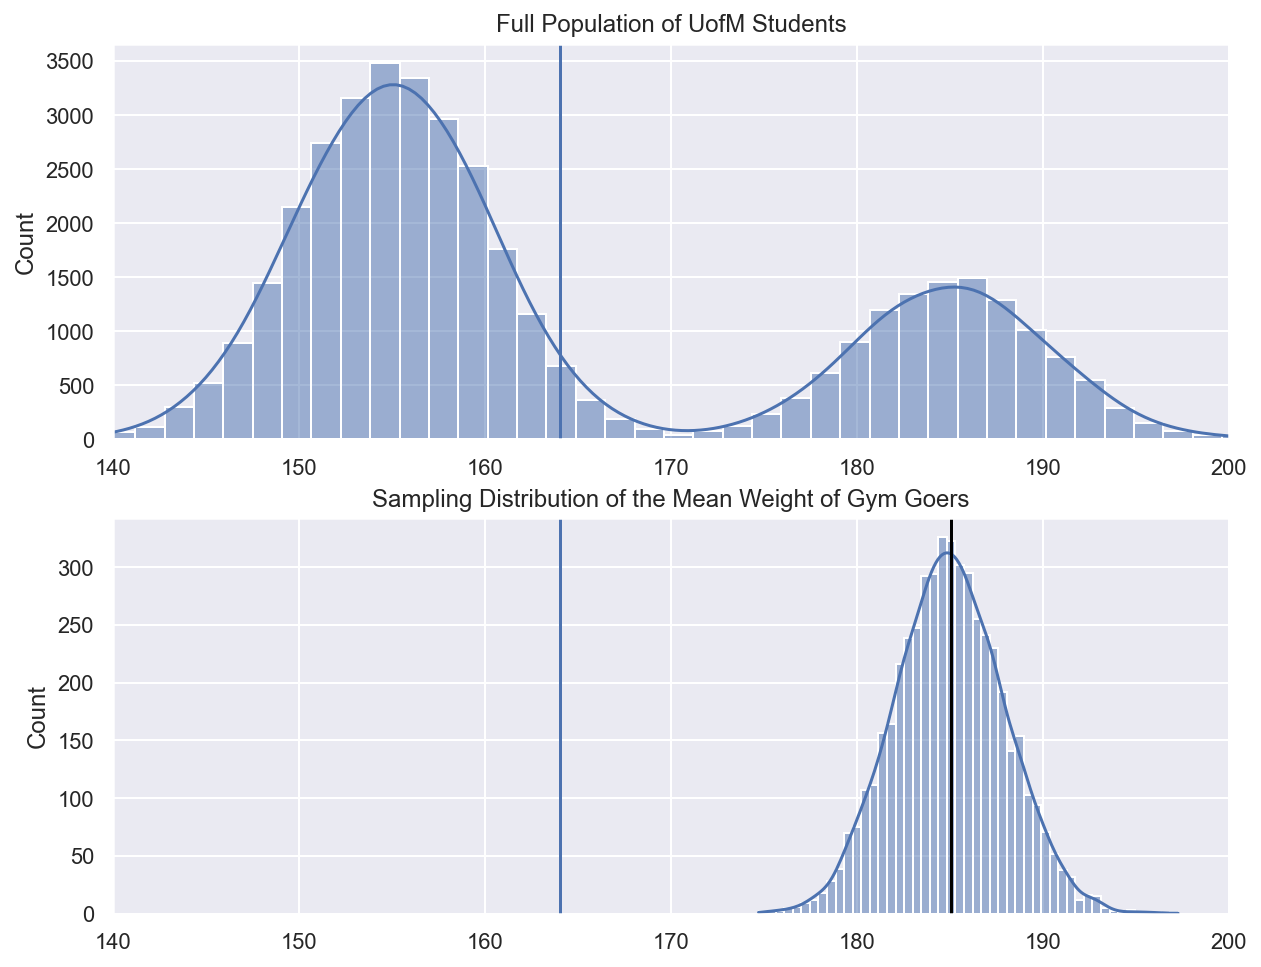

In [7]:
number_samps = 5000
samp_size = 3

# get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(number_samps)
for i in range(number_samps):
    random_students = np.random.choice(students_at_gym, samp_size)
    mean_distribution[i] = np.mean(random_students) 
    
plt.figure(figsize=(10, 8))

# plotting the population again
plt.subplot(2, 1, 1)
sns.histplot(population, kde=True)
plt.title('Full Population of UofM Students')
plt.axvline(np.mean(population))
plt.xlim([140, 200])

# plotting the sampling distribution
plt.subplot(2, 1, 2)
sns.histplot(mean_distribution, kde=True)
plt.title('Sampling Distribution of the Mean Weight of Gym Goers')
plt.axvline(np.mean(population))
plt.axvline(np.mean(students_at_gym), color='black')
plt.xlim([140, 200])

plt.show()

#### Emprical Rule

In [8]:
random.seed(1738)

In [9]:
# create the population like in week-2 lesson
mu = 7
sigma = 1.7

observations = [random.normalvariate(mu, sigma) for _ in range(100000)]

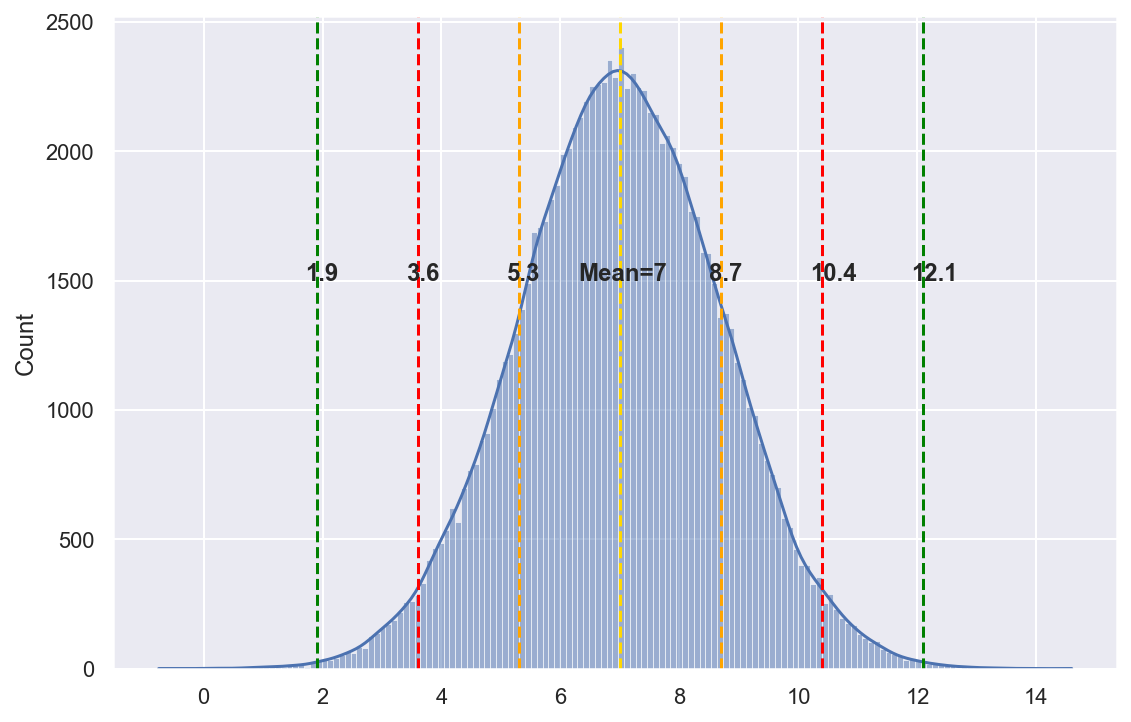

In [10]:
colors = ['orange', 'red', 'green']

plt.figure(figsize=(9, 6))

# bell curve
ax = sns.histplot(observations, kde=True)

# mean line
plt.axvline(mu, color='gold', linestyle='--')
plt.text(6.3, 1500, 'Mean=7', fontweight='bold')

for i in range(1, 4):
    pos_line = round(mu + i * sigma, 2)
    neg_line = round(mu - i * sigma, 2)
    
    plt.axvline(pos_line, color=colors[i - 1], linestyle='--')
    plt.axvline(neg_line, color=colors[i - 1], linestyle='--')
    
    plt.text(pos_line - 0.2, 1500, f'{pos_line}', fontweight='bold')
    plt.text(neg_line - 0.2, 1500, f'{neg_line}', fontweight='bold')

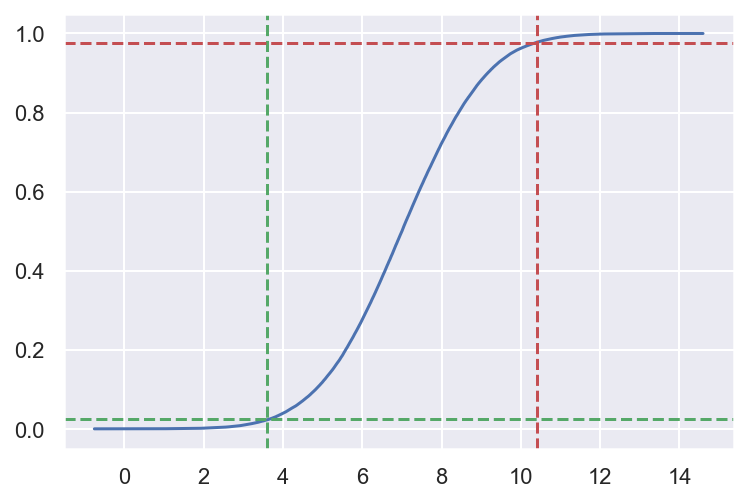

In [11]:
# ECDF: Empirical Cumulative Density Function
ecdf = ECDF(observations)
plt.plot(ecdf.x, ecdf.y)

plt.axhline(y=0.025, color='g', linestyle='--')
plt.axvline(x=mu - 2 * sigma, color='g', linestyle='--')

plt.axhline(y=0.975, color='r', linestyle='--')
plt.axvline(x= mu + 2 * sigma, color='r', linestyle='--')

plt.savefig('/Users/ytu-egemen-zeytinci/Desktop/img.png')
plt.show()

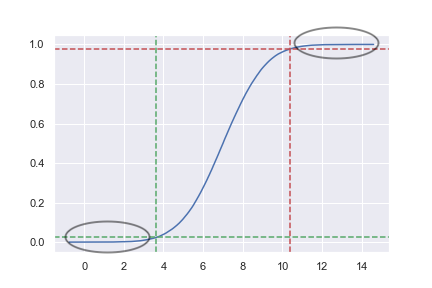

In [12]:
Image('images/example_4.png', width=400)

- As you can see in the graph, the parts inside the circle are 5% of the data.
- For example, by looking at this graph, we can say that the number of students who sleep over 10 and less than 4 hours makes up 5%.